# Name: Rawan Mohamed Said
# ID: 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration and Visualization

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,ID,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,Female,6,148,72,35,0,33.6,0.627,50.0,1
1,2,Female,1,85,66,29,0,26.6,0.351,31.0,0
2,3,Male,8,183,64,0,0,23.3,0.672,32.0,1
3,4,Male,1,89,66,23,94,28.1,0.167,21.0,0
4,5,Female,0,137,40,35,168,43.1,2.288,33.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        800 non-null    int64  
 1   Gender                    800 non-null    object 
 2   Pregnancies               800 non-null    int64  
 3   Glucose                   800 non-null    int64  
 4   BloodPressure             800 non-null    int64  
 5   SkinThickness             800 non-null    int64  
 6   Insulin                   800 non-null    int64  
 7   BMI                       800 non-null    float64
 8   DiabetesPedigreeFunction  787 non-null    float64
 9   Age                       784 non-null    float64
 10  Outcome                   800 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 68.9+ KB


In [4]:
data.describe()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,787.000000,784.000000,800.000000
mean,400.5000,3.848750,121.047500,68.876250,20.225000,80.330000,31.834375,0.473583,33.473214,0.352500
std,231.0844,3.356703,31.997422,19.779028,15.988712,118.388876,8.080507,0.338200,11.886406,0.478047
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,200.7500,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.238500,24.000000,0.000000
50%,400.5000,3.000000,117.000000,72.000000,23.000000,22.500000,32.000000,0.374000,29.000000,0.000000
75%,600.2500,6.000000,140.000000,80.000000,32.000000,129.250000,36.500000,0.621500,41.000000,1.000000
max,800.0000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


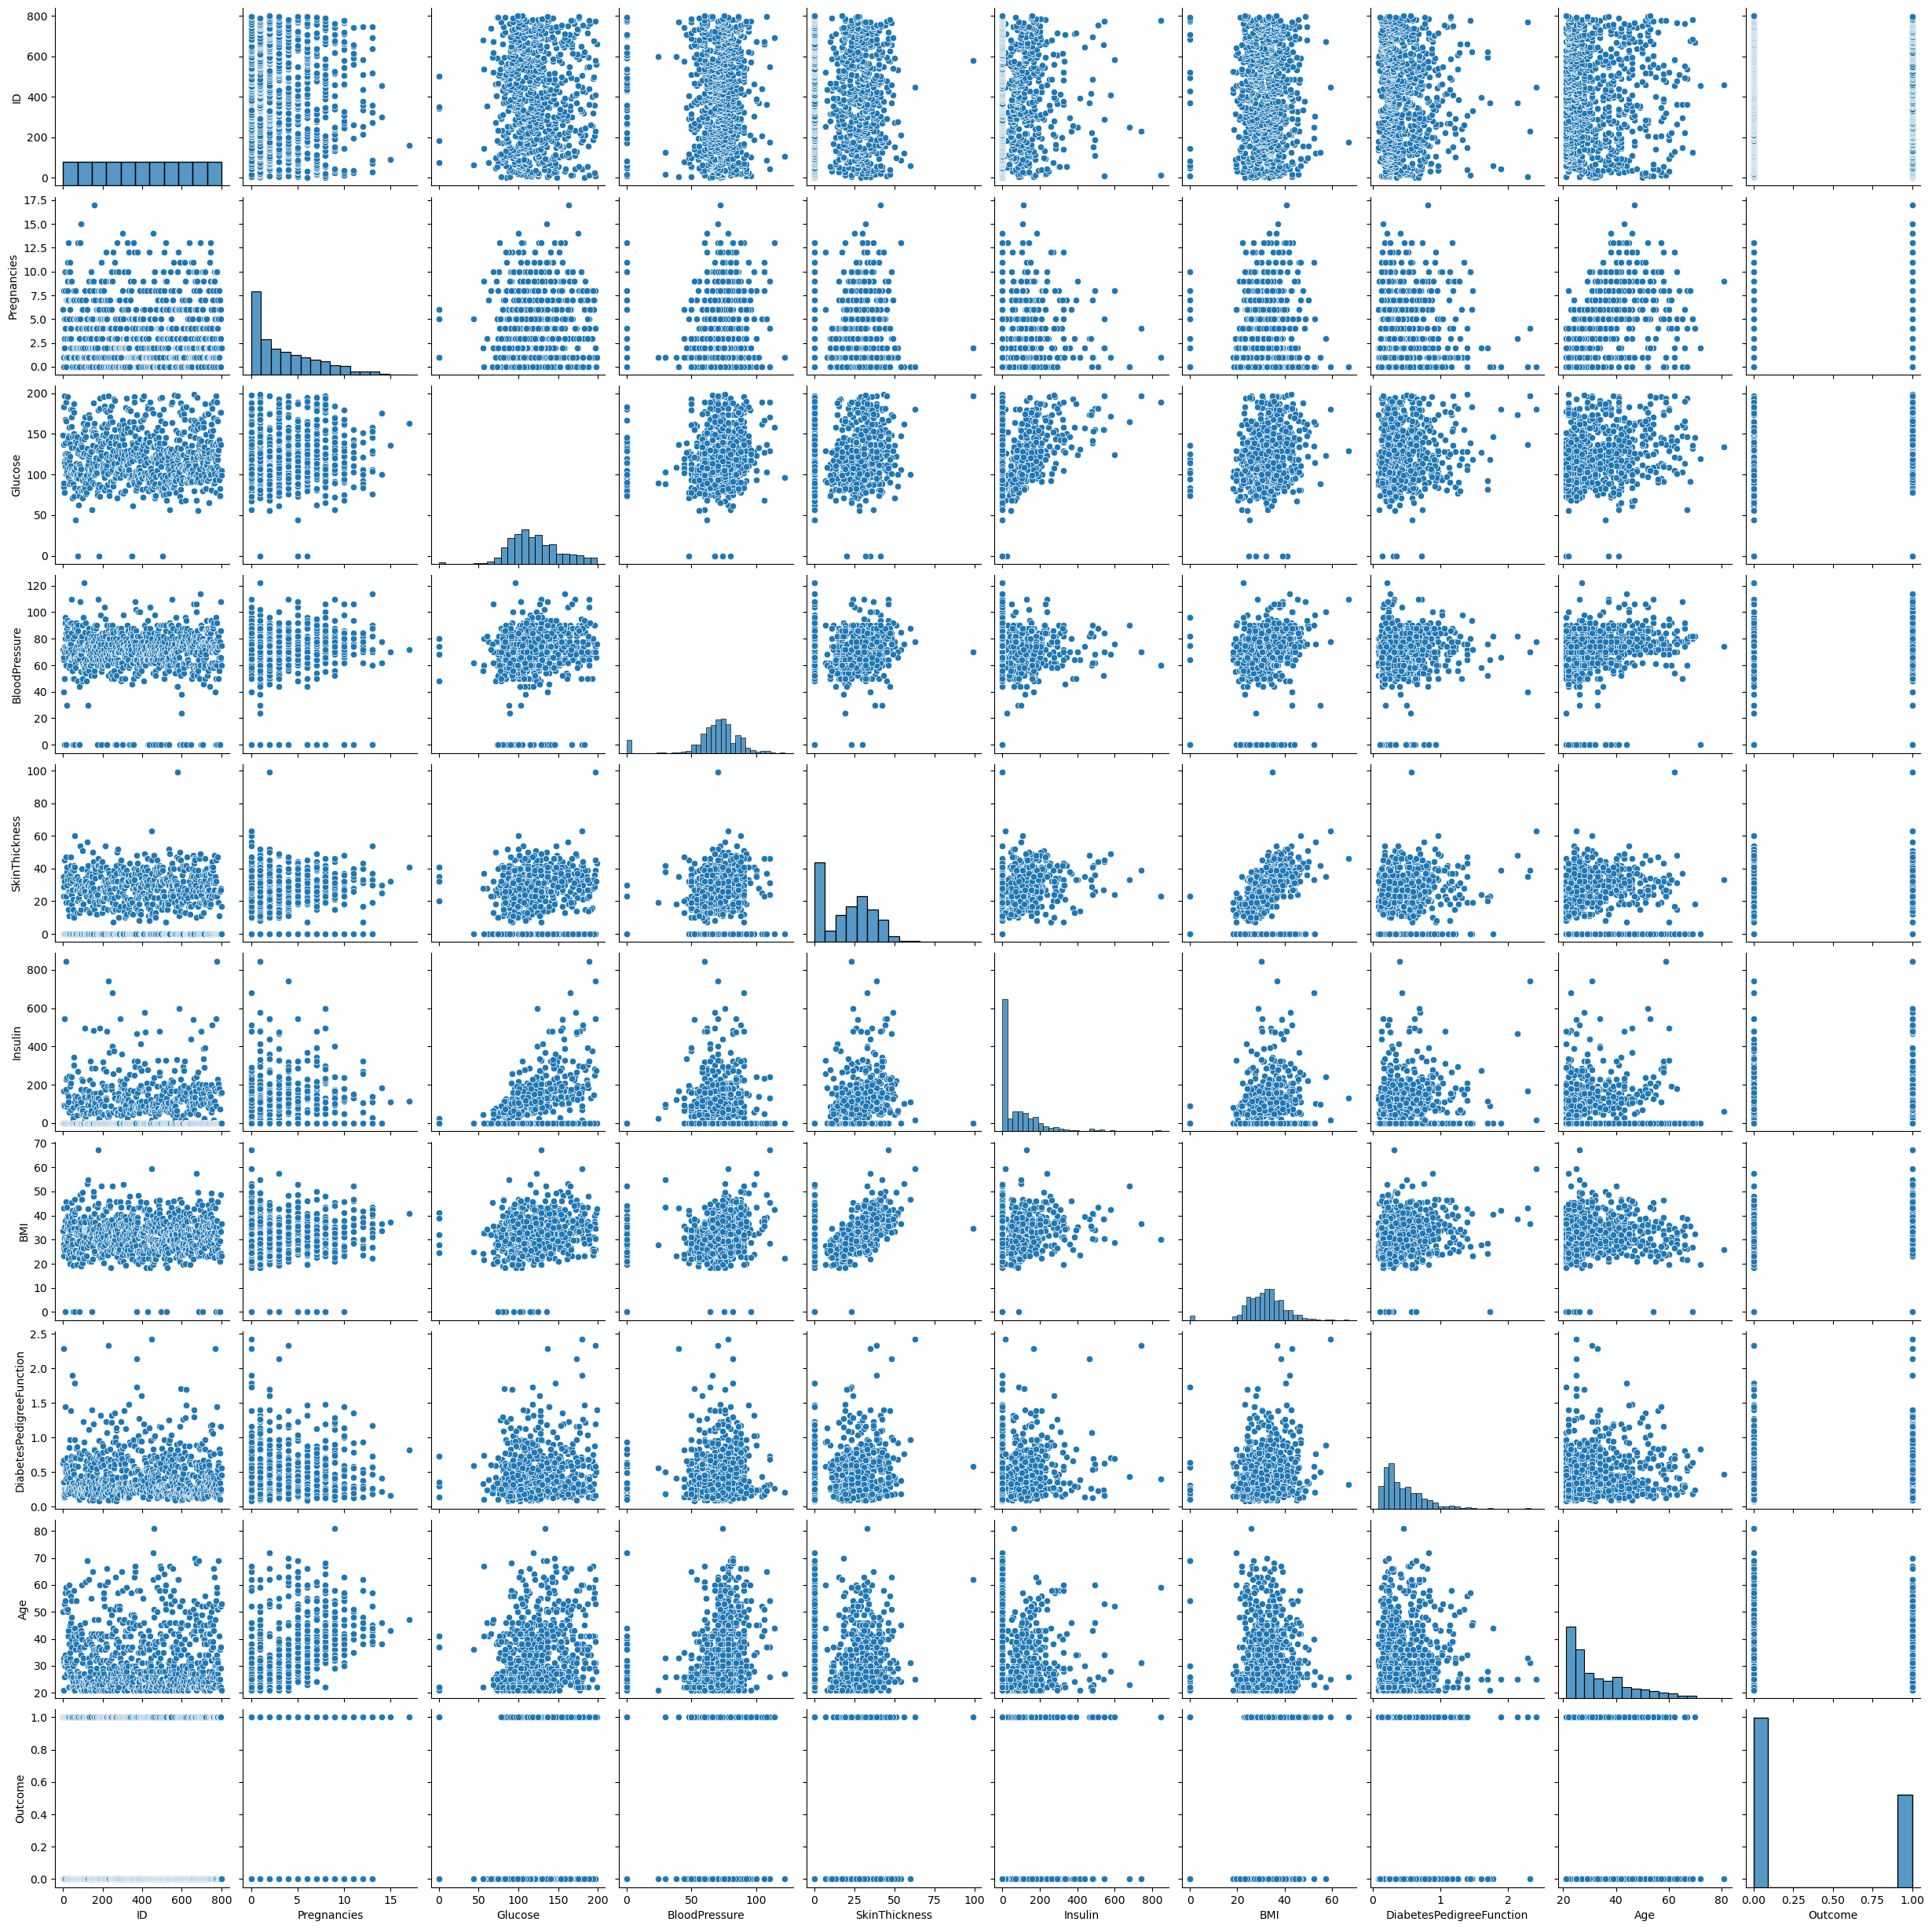

In [5]:
sns.pairplot(data)

## Data Cleaning

In [6]:
data.isnull().sum()

ID                           0
Gender                       0
Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction    13
Age                         16
Outcome                      0
dtype: int64

In [7]:
data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].mean(), inplace = True)
data['Age'].fillna(data['Age'].mean(), inplace = True)
data.isnull().sum()

ID                          0
Gender                      0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Preprocessing

In [8]:
data = data.drop('ID', axis=1)
data.duplicated().sum()

32

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    768 non-null    object 
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    float64
 9   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 66.0+ KB


### Removing Outliers

In [11]:
data_for_tuning = data.copy()
data_for_tuning = data_for_tuning[(data_for_tuning['SkinThickness'] <= data_for_tuning['SkinThickness'].quantile(0.999))]
data_for_tuning.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,120.795306,69.104302,20.434159,79.903520,31.989048,0.471593,33.305900,0.348110
std,3.371117,31.874936,19.368410,15.708524,115.283105,7.888698,0.329880,11.656382,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.380000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.614500,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data = data[(data["SkinThickness"] <= data["SkinThickness"].quantile(0.999))]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,120.795306,69.104302,20.434159,79.903520,31.989048,0.471593,33.305900,0.348110
std,3.371117,31.874936,19.368410,15.708524,115.283105,7.888698,0.329880,11.656382,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.380000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.614500,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data_for_tuning = data.copy()
data_for_tuning = data_for_tuning[(data_for_tuning['Insulin'] <= data_for_tuning['Insulin'].quantile(0.99))]
data_for_tuning.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.857708,120.284585,69.081686,20.275362,74.056653,31.933465,0.469238,33.255105,0.345191
std,3.377840,31.557514,19.433566,15.683943,100.159757,7.875786,0.324102,11.626824,0.475744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.250000,0.243500,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,23.000000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.500000,0.612500,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,510.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data = data[(data["Insulin"] <= data["Insulin"].quantile(0.99))]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.857708,120.284585,69.081686,20.275362,74.056653,31.933465,0.469238,33.255105,0.345191
std,3.377840,31.557514,19.433566,15.683943,100.159757,7.875786,0.324102,11.626824,0.475744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.250000,0.243500,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,23.000000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.500000,0.612500,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,510.000000,67.100000,2.420000,81.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1efc4c8da20>,
 'caps': [<matplotlib.lines.Line2D at 0x1efc4c8df60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efc4c8d780>],
 'medians': [<matplotlib.lines.Line2D at 0x1efc4c8e4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efc4c8e740>],
 'means': []}

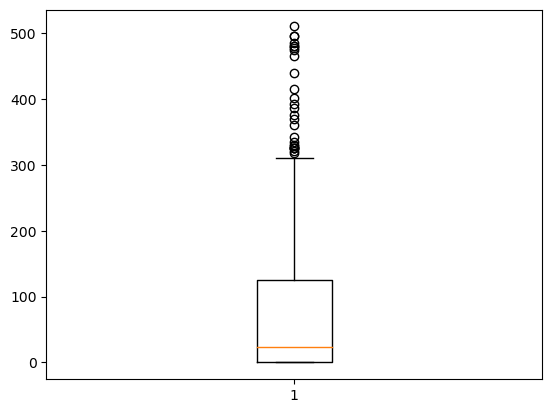

In [15]:
plt.boxplot(data['Insulin'])

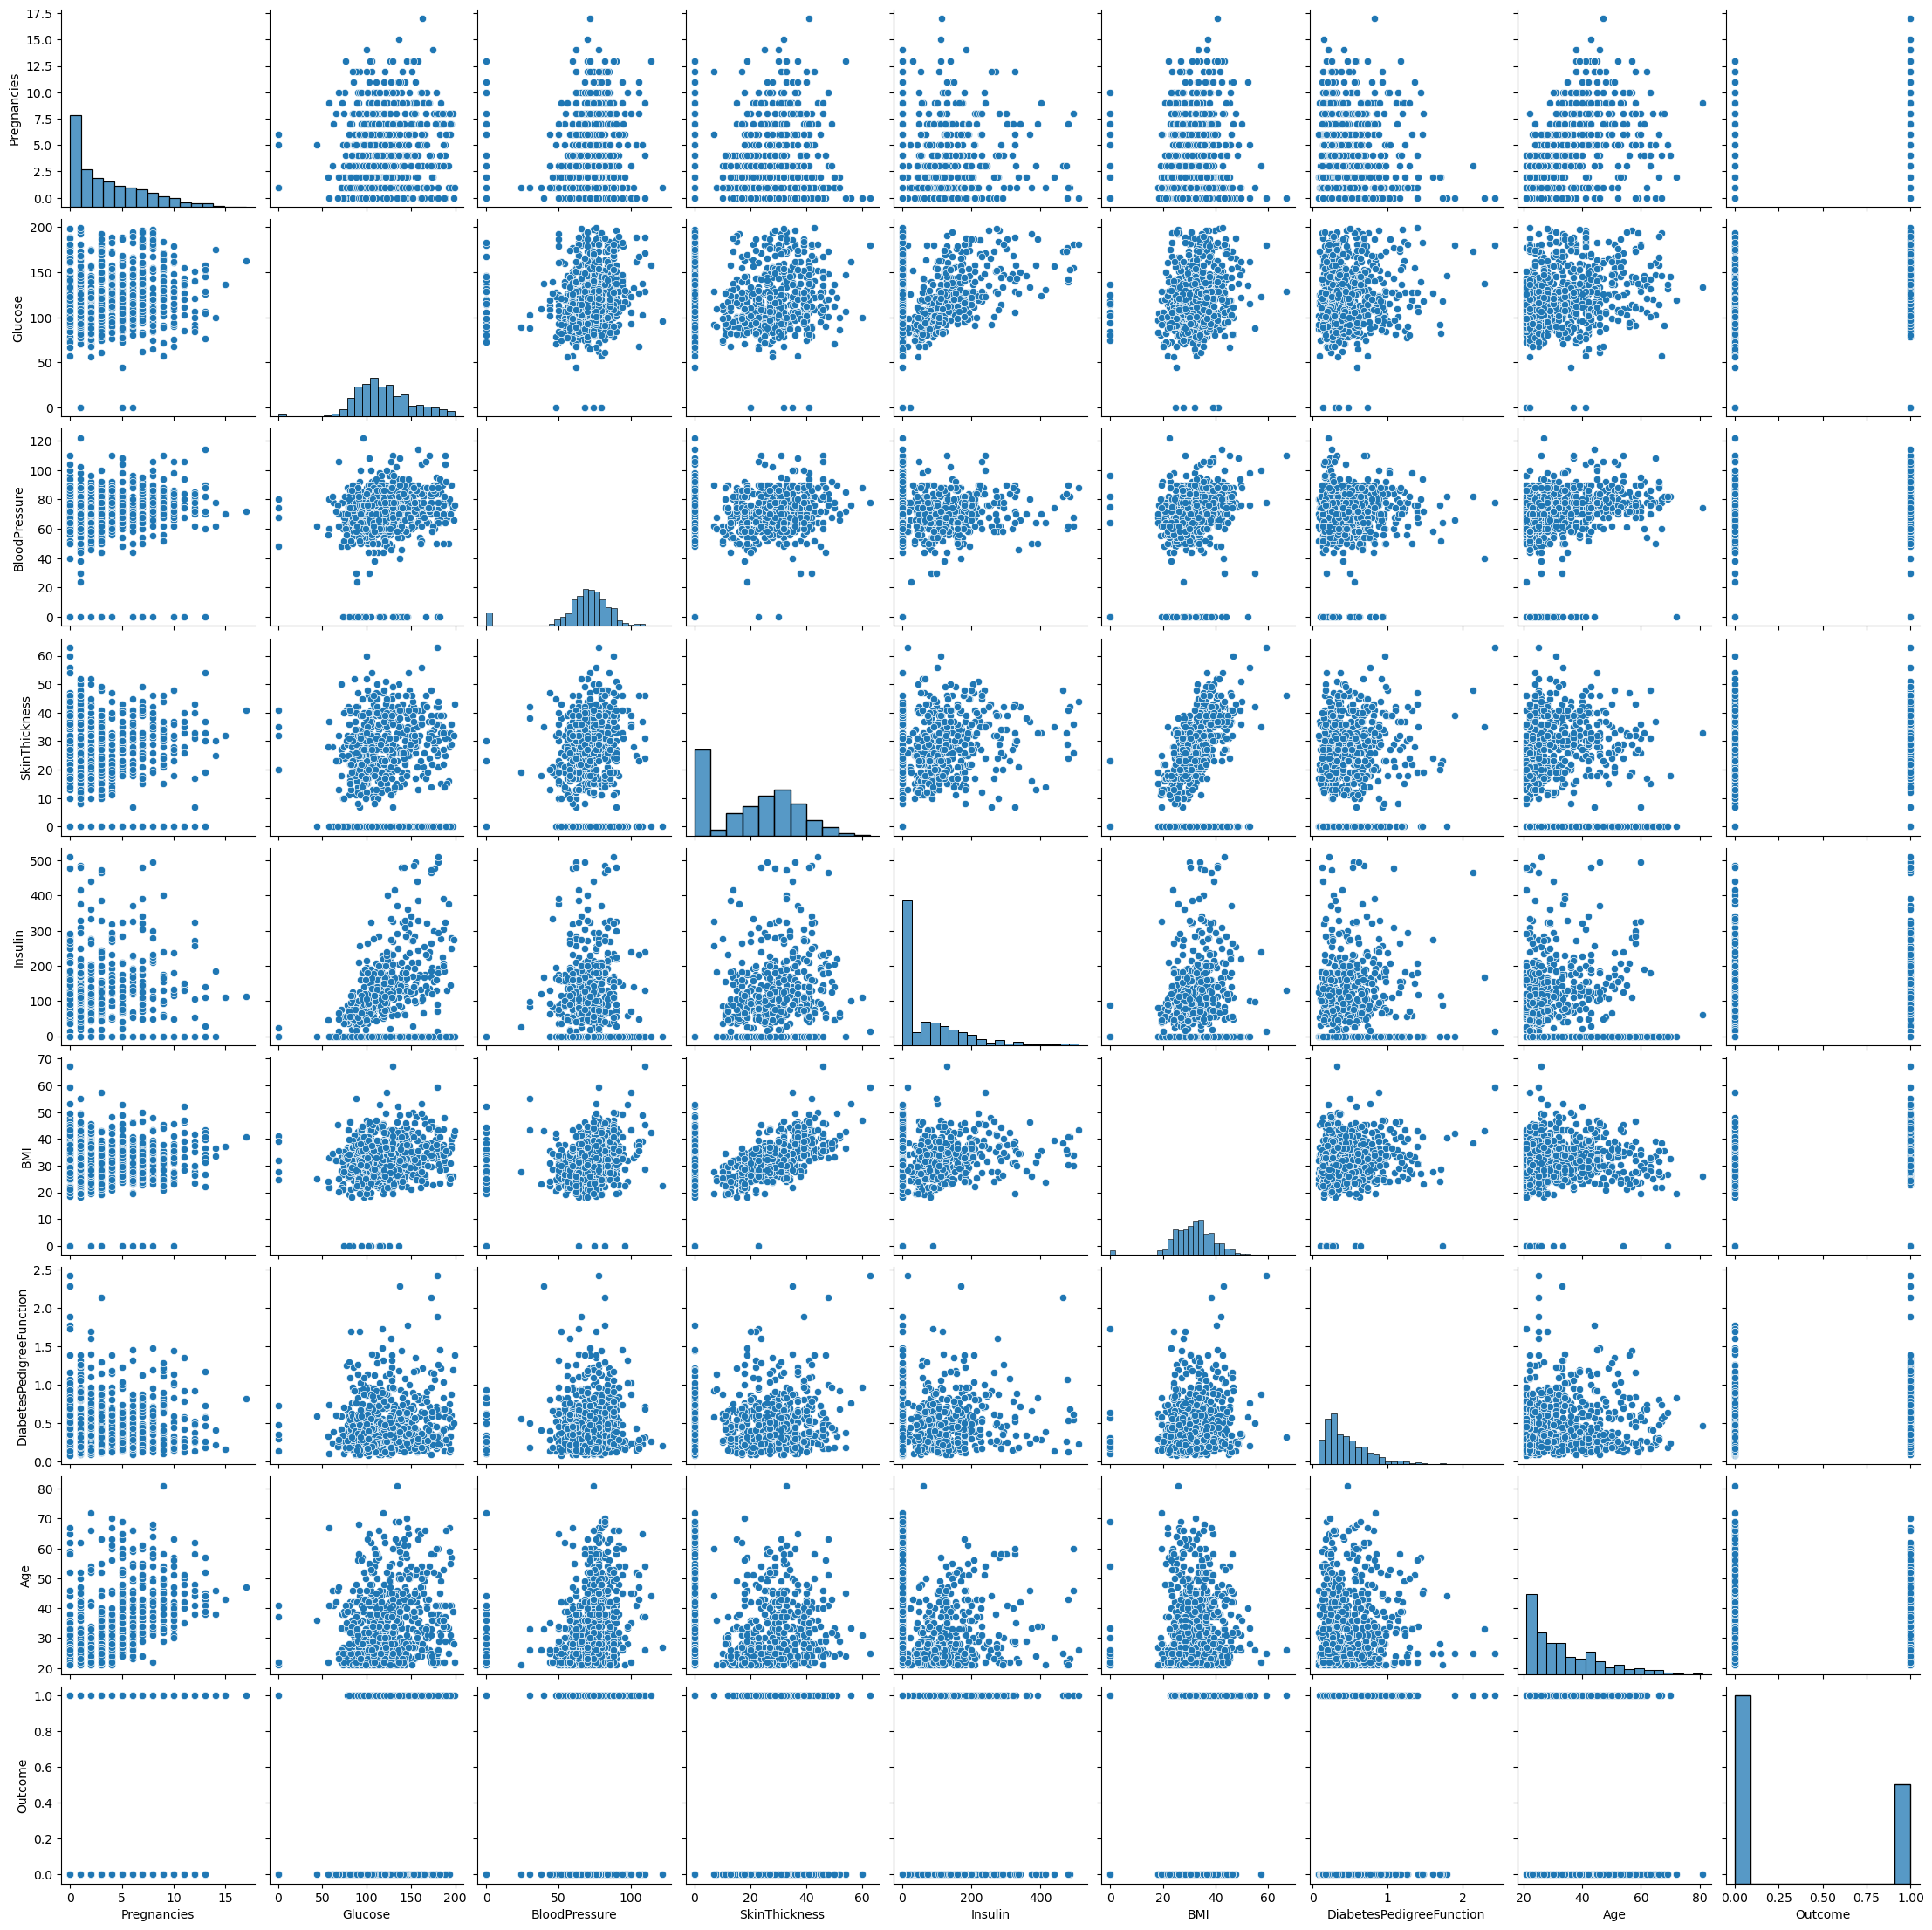

In [16]:
sns.pairplot(data)

In [17]:
data['Gender'].value_counts()

Female    382
Male      377
Name: Gender, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [19]:
data.reset_index(inplace=True)
data

,index,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,6,148,72,35,0,33.6,0.627000,50.0,1
1,1,0,1,85,66,29,0,26.6,0.351000,31.0,0
2,2,1,8,183,64,0,0,23.3,0.672000,32.0,1
3,3,1,1,89,66,23,94,28.1,0.167000,21.0,0
4,4,0,0,137,40,35,168,43.1,2.288000,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...
754,763,0,10,101,76,48,180,32.9,0.171000,63.0,0
755,764,1,2,122,70,27,0,36.8,0.340000,27.0,0
756,765,1,5,121,72,23,112,26.2,0.473583,30.0,0
757,766,1,1,126,60,0,0,30.1,0.349000,47.0,1


## Feature Engineering and Selection

In [20]:
data.corr()

,index,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
index,1.000000,0.052870,-0.041164,0.022604,0.022515,0.019025,0.029924,0.013217,-0.039265,0.004646,-0.047109
Gender,0.052870,1.000000,-0.028380,-0.007210,0.011561,-0.016108,-0.046370,-0.013498,0.007694,-0.036589,0.004783
Pregnancies,-0.041164,-0.028380,1.000000,0.142225,0.141582,-0.076481,-0.067007,0.023953,-0.038045,0.546853,0.227634
Glucose,0.022604,-0.007210,0.142225,1.000000,0.154933,0.026291,0.299150,0.215074,0.125417,0.253862,0.466468
BloodPressure,0.022515,0.011561,0.141582,0.154933,1.000000,0.210046,0.097233,0.280874,0.041609,0.236943,0.069292
SkinThickness,0.019025,-0.016108,-0.076481,0.026291,0.210046,1.000000,0.468737,0.393687,0.174072,-0.135183,0.063802
Insulin,0.029924,-0.046370,-0.067007,0.299150,0.097233,0.468737,1.000000,0.192298,0.165351,-0.075928,0.121242
BMI,0.013217,-0.013498,0.023953,0.215074,0.280874,0.393687,0.192298,1.000000,0.135864,0.034762,0.298062
DiabetesPedigreeFunction,-0.039265,0.007694,-0.038045,0.125417,0.041609,0.174072,0.165351,0.135864,1.000000,0.035416,0.183823
Age,0.004646,-0.036589,0.546853,0.253862,0.236943,-0.135183,-0.075928,0.034762,0.035416,1.000000,0.227308


<Axes: >

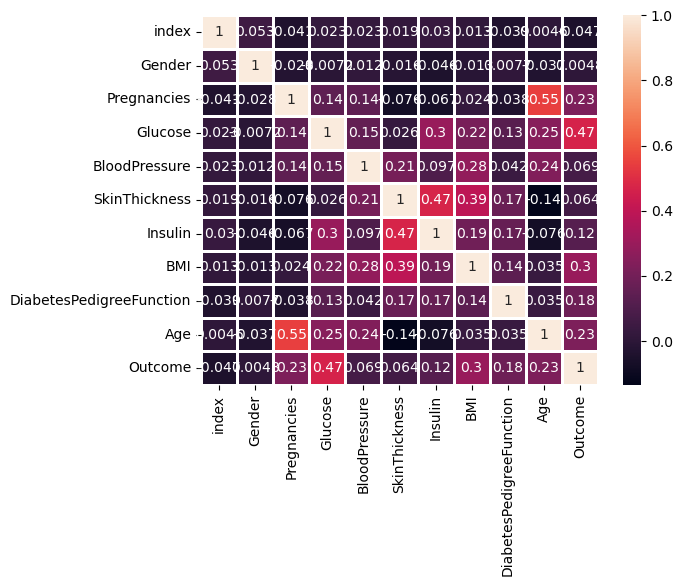

In [21]:
sns.heatmap(data.corr(),annot=True,linewidths=1)

In [22]:
corr = data.corr()['Outcome']
columns_to_drop = corr[(corr < 0.3) & (corr > -0.3)].index
data = data.drop(columns=columns_to_drop)
data.corr()

,Glucose,Outcome
Glucose,1.000000,0.466468
Outcome,0.466468,1.000000


## Testing Split

In [23]:
from sklearn.model_selection import train_test_split

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)


LogisticRegression()

In [25]:
y_test_pred = LR.predict(x_test)
print(y_test_pred)

[0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0]


In [26]:
print(y_test)

393    0
515    0
97     1
511    0
109    1
      ..
18     0
610    1
140    0
446    0
328    0
Name: Outcome, Length: 228, dtype: int64


## Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy = ', accuracy)

Accuracy =  0.8114035087719298


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
show = pd.DataFrame(cm,columns=["Predicted_Yes","Predicted_No"],index=["Actual_Yes","Actual_No"])
show.head()

,Predicted_Yes,Predicted_No
Actual_Yes,148,11
Actual_No,32,37
